<a href="https://colab.research.google.com/github/nJiyeon/ComputerVision/blob/main/assignmemt1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
up = files.upload()

Saving dolphin.png to dolphin.png
Saving dolphin_edge.png to dolphin_edge.png


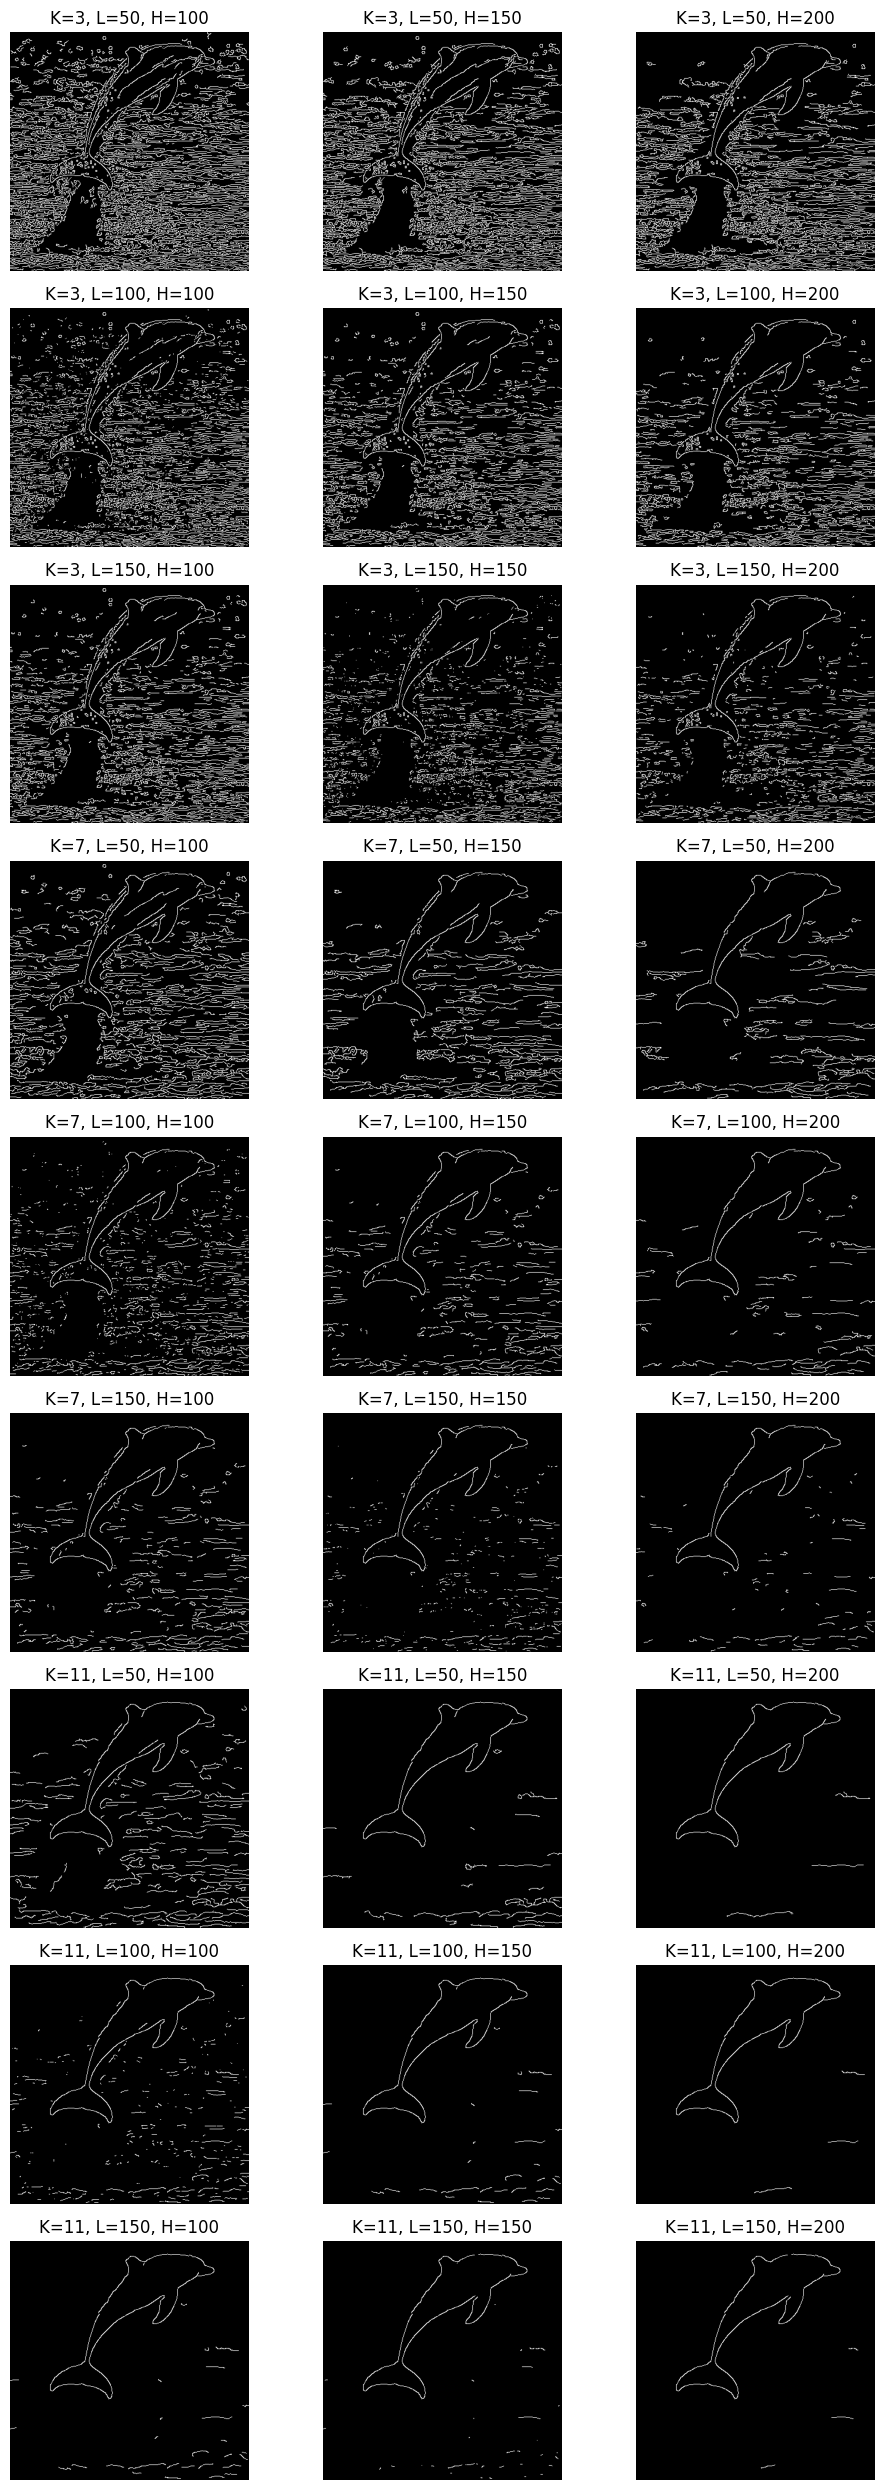

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기 (흑백으로)
try:
    image = cv2.imread('dolphin.png', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("dolphin.png 파일을 찾을 수 없습니다.")
except Exception as e:
    print(e)
    exit()

# 2. 하이퍼파라미터 리스트
K_values = [3, 7, 11]
L_values = [50, 100, 150]
H_values = [100, 150, 200]

# 3. 결과를 표시할 격자(Grid) 생성 - 9 x 9
fig, axes = plt.subplots(9, 3, figsize=(10, 25))

# 4. 3중 for 문으로 모든 조합 실험 및 결과 그리기
i = 0
for k in K_values:
    for l in L_values:
        for h in H_values:
            # Sigma 값
            sigma = 0.3 * ((k - 1) * 0.5 - 1) + 0.8

            # 가우시안 블러 적용
            blurred_image = cv2.GaussianBlur(image, (k, k), sigmaX=sigma)

            # Canny 엣지 검출
            edges = cv2.Canny(blurred_image, l, h)

            # 격자의 해당 위치에 결과 이미지 넣기
            row_index = i // 3
            col_index = i % 3

            ax = axes[row_index, col_index]
            ax.imshow(edges, cmap='gray')
            ax.set_title(f'K={k}, L={l}, H={h}') # 파라미터 값으로 제목 설정
            ax.axis('off') # 축 정보(눈금)는 숨기기

            i += 1

# 5. 전체 창 띄우기
fig.tight_layout()
plt.show()